In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [2]:
# reading the dataset
df = pd.read_csv(r'../train.csv')
# standardizating the dataset columns
df.columns = df.columns.str.lower().str.replace(' ','_')
df.sample(5)

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
13271,13272,2357,318,23,270,110,953,154,212,195,...,0,0,0,0,0,0,0,0,0,6
3207,3208,2252,128,35,295,165,708,252,195,39,...,0,0,0,0,0,0,0,0,0,4
11471,11472,2732,114,26,283,111,1501,253,205,62,...,0,0,0,0,0,0,0,0,0,5
2593,2594,2169,349,16,90,20,300,189,212,160,...,0,0,0,0,0,0,0,0,0,2
1334,1335,3188,67,8,170,6,5121,228,224,129,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# splitting into independent and dependent classes
independent_variable = df.drop(columns='cover_type')
dependent_variable = df['cover_type'] - 1 # adjust labels to be zero-based for model compatibility

In [4]:
# splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size=0.2, random_state=42)

In [5]:
display(x_train.sample(2),x_test.sample(2))

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
11338,11339,2454,175,29,175,68,190,221,240,130,...,0,0,0,0,0,0,0,0,0,0
6328,6329,2491,45,11,516,81,524,223,216,126,...,0,0,0,0,0,0,0,0,0,0


,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
11489,11490,2780,178,14,170,19,2933,225,247,151,...,0,0,0,0,0,0,0,0,0,0
542,543,2699,165,3,390,2,908,222,240,154,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
display(x_train,x_test)

array([[-0.66027127, -0.93192165, -1.39353286, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.21218549,  0.31796942, -0.8590903 , ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.89370397,  0.53230526,  0.04674455, ..., -0.22401411,
        -0.21279501, -0.17614271],
       ...,
       [-0.49731015,  0.50822258, -0.03478058, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-1.53558564,  0.35409343,  0.88011261, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.06641436,  1.50042898, -0.71415672, ...,  4.46400444,
        -0.21279501, -0.17614271]])

array([[-0.33984983, -0.76815943, -0.08913067, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.07660637, -0.23593221, -0.38805617, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.16955431,  1.905018  ,  1.43267187, ..., -0.22401411,
        -0.21279501,  5.67721492],
       ...,
       [-1.19476541,  0.07955089, -0.62357323, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 1.11419426, -0.98249528,  0.24602822, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.90734875, -1.55807132, -0.02572223, ..., -0.22401411,
        -0.21279501, -0.17614271]])

In [11]:
# defining the model

model = Sequential(
    [
        Dense(128, input_shape=(x_train.shape[1],)),
        LeakyReLU(alpha=0.01), # Leaky ReLU with alpha parameter
        Dense(64),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),
        Dense(14),
        LeakyReLU(alpha=0.01),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

In [12]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# train the model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4386 - loss: 1.4373 - val_accuracy: 0.6583 - val_loss: 0.8193
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6621 - loss: 0.8328 - val_accuracy: 0.6694 - val_loss: 0.7505
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6880 - loss: 0.7498 - val_accuracy: 0.7000 - val_loss: 0.7113
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7028 - loss: 0.6983 - val_accuracy: 0.7165 - val_loss: 0.6681
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7285 - loss: 0.6520 - val_accuracy: 0.7260 - val_loss: 0.6406
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7392 - loss: 0.6348 - val_accuracy: 0.7273 - val_loss: 0.6213
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.7361 - loss: 0.6245 - val_accuracy: 0.7289 - val_loss: 0.6231
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7414 - loss: 0.6093 - val_

In [14]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8277 - loss: 0.4718
Test Accuracy: 0.83
Test Loss: 0.49


In [15]:
# prediction
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       421
           1       0.74      0.66      0.70       438
           2       0.81      0.71      0.76       428
           3       0.92      0.96      0.94       449
           4       0.89      0.91      0.90       416
           5       0.76      0.86      0.81       432
           6       0.93      0.95      0.94       440

    accuracy                           0.83      3024
   macro avg       0.83      0.83      0.83      3024
weighted avg       0.83      0.83      0.83      3024



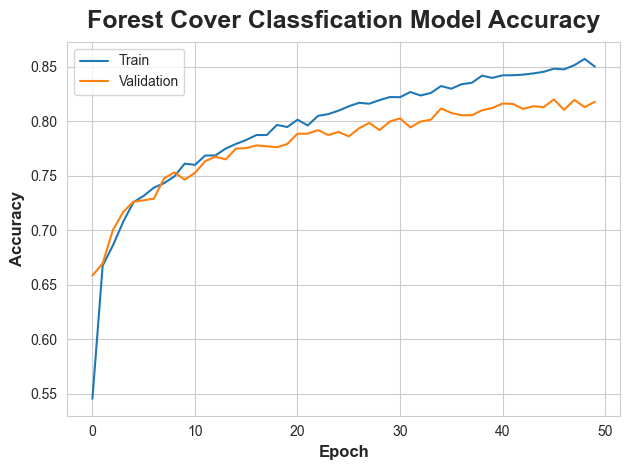

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Forest Cover Classfication Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

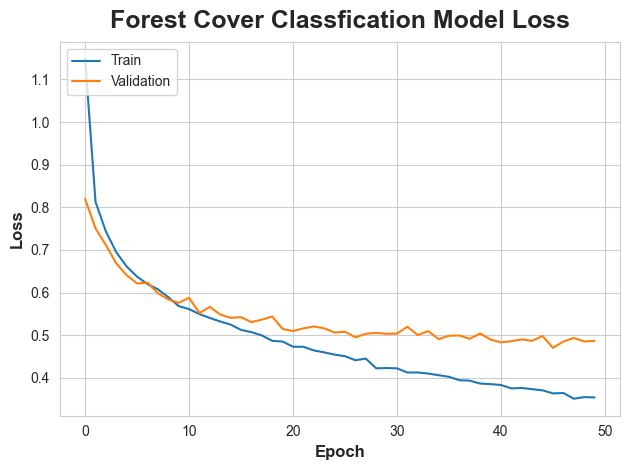

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Forest Cover Classfication Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()